In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [96]:
data=pd.read_csv("D:\\DSML\\project\\diabetes_data.csv")

In [97]:
data

,age,gender,bmi,bmi_category,systolic,diastolic,blood_pressure_category,cholesterol,cholesterol_category,glucose,diabetes_probability
0,55,Female,29.59,Overweight,112.0,89.5,Hypertension Stage 1,247,High,139,0.65
1,34,Male,30.68,Obesity,106.0,115.0,Hypertension Stage 2,255,High,101,0.60
2,26,Male,15.96,Underweight,96.0,97.0,Hypertension Stage 2,234,Borderline high,97,0.15
3,63,Male,15.61,Underweight,109.6,115.3,Hypertension Stage 2,261,High,143,0.70
4,37,Male,41.54,Obesity,110.0,103.0,Hypertension Stage 2,226,Borderline high,115,0.50
...,...,...,...,...,...,...,...,...,...,...,...
9995,81,Male,18.44,Underweight,111.2,97.1,Hypertension Stage 2,247,High,137,0.70
9996,29,Male,37.29,Obesity,112.0,76.0,Normal,196,Normal,87,0.20
9997,84,Female,32.15,Obesity,114.8,92.4,Hypertension Stage 2,300,High,129,0.90
9998,76,Female,31.79,Obesity,117.2,125.6,Hypertension Stage 2,223,Borderline high,131,0.80


In [111]:
print("Dataset Info:\n")
data.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   10000 non-null  int64  
 1   gender                10000 non-null  int32  
 2   bmi                   10000 non-null  float64
 3   systolic              10000 non-null  float64
 4   diastolic             10000 non-null  float64
 5   cholesterol           10000 non-null  int64  
 6   glucose               10000 non-null  int64  
 7   diabetes_probability  10000 non-null  float64
dtypes: float64(4), int32(1), int64(3)
memory usage: 586.1 KB


In [112]:
print("\nDataset Description:\n")
data.describe()


Dataset Description:

                age        gender           bmi      systolic     diastolic  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      54.062300      0.494400     26.309132    106.052700     95.717600   
std       21.058294      0.499994      8.396257      7.207495     17.863035   
min       18.000000      0.000000     11.080000     90.000000     60.000000   
25%       36.000000      0.000000     19.870000    100.600000     80.400000   
50%       55.000000      0.000000     25.095000    106.000000     95.700000   
75%       72.000000      1.000000     31.382500    111.400000    111.000000   
max       90.000000      1.000000     53.210000    125.000000    132.000000   

        cholesterol       glucose  diabetes_probability  
count  10000.000000  10000.000000          10000.000000  
mean     228.748600    120.525300              0.489040  
std       35.667787     21.095224              0.231504  
min      150.000000     70.000000

In [114]:
print("\nMissing Values:\n")
data.isnull().sum()


Missing Values:



age                     0
gender                  0
bmi                     0
systolic                0
diastolic               0
cholesterol             0
glucose                 0
diabetes_probability    0
dtype: int64

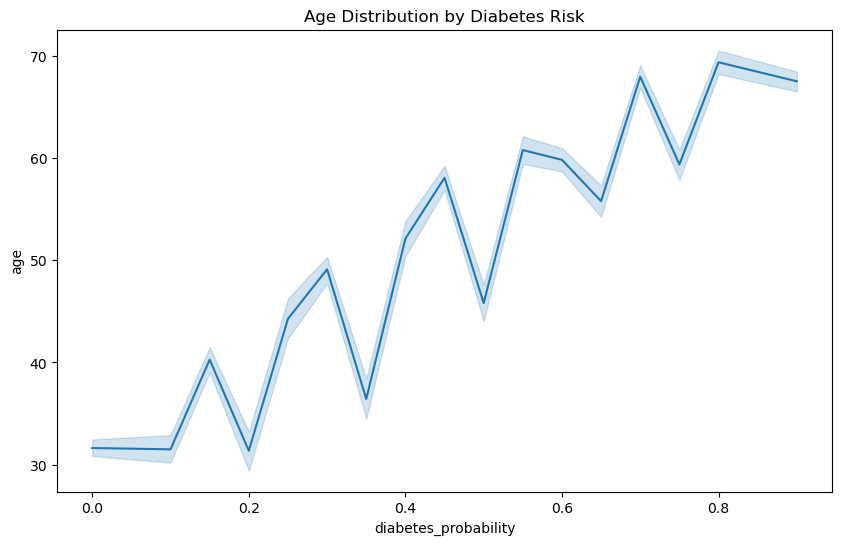

In [99]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data,x="diabetes_probability",y="age")
plt.title("Age Distribution by Diabetes Risk");

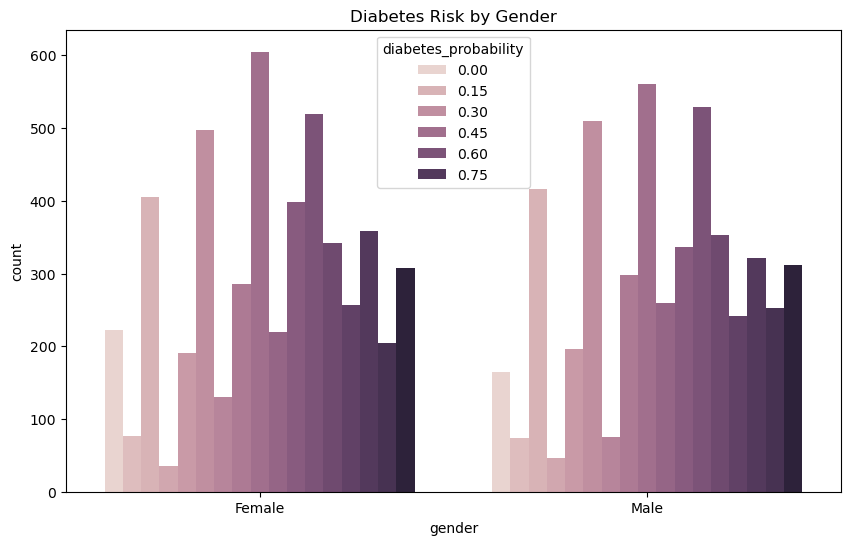

In [101]:

plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='diabetes_probability', data=data)
plt.title('Diabetes Risk by Gender')
plt.show()

In [102]:
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['gender', 'bmi_category', 'blood_pressure_category',
       'cholesterol_category'],
      dtype='object')

In [103]:
data=data.drop(["bmi_category","blood_pressure_category","cholesterol_category"],axis=1)

In [104]:
encoder_gender = LabelEncoder()
data['gender'] = encoder_gender.fit_transform(data['gender'])

In [105]:
data.head(5)

,age,gender,bmi,systolic,diastolic,cholesterol,glucose,diabetes_probability
0,55,0,29.59,112.0,89.5,247,139,0.65
1,34,1,30.68,106.0,115.0,255,101,0.60
2,26,1,15.96,96.0,97.0,234,97,0.15
3,63,1,15.61,109.6,115.3,261,143,0.70
4,37,1,41.54,110.0,103.0,226,115,0.50


In [106]:
data.corr()

,age,gender,bmi,systolic,diastolic,cholesterol,glucose,diabetes_probability
age,1.000000,-0.000618,0.004303,0.442549,0.090589,0.218889,0.289023,0.437521
gender,-0.000618,1.000000,0.005026,0.339825,0.054140,-0.000376,0.001858,0.013035
bmi,0.004303,0.005026,1.000000,0.558347,0.116801,0.439136,0.273656,0.533106
systolic,0.442549,0.339825,0.558347,1.000000,0.153674,0.402785,0.319581,0.572796
diastolic,0.090589,0.054140,0.116801,0.153674,1.000000,0.065127,0.281352,0.460102
cholesterol,0.218889,-0.000376,0.439136,0.402785,0.065127,1.000000,0.239987,0.552642
glucose,0.289023,0.001858,0.273656,0.319581,0.281352,0.239987,1.000000,0.768752
diabetes_probability,0.437521,0.013035,0.533106,0.572796,0.460102,0.552642,0.768752,1.000000


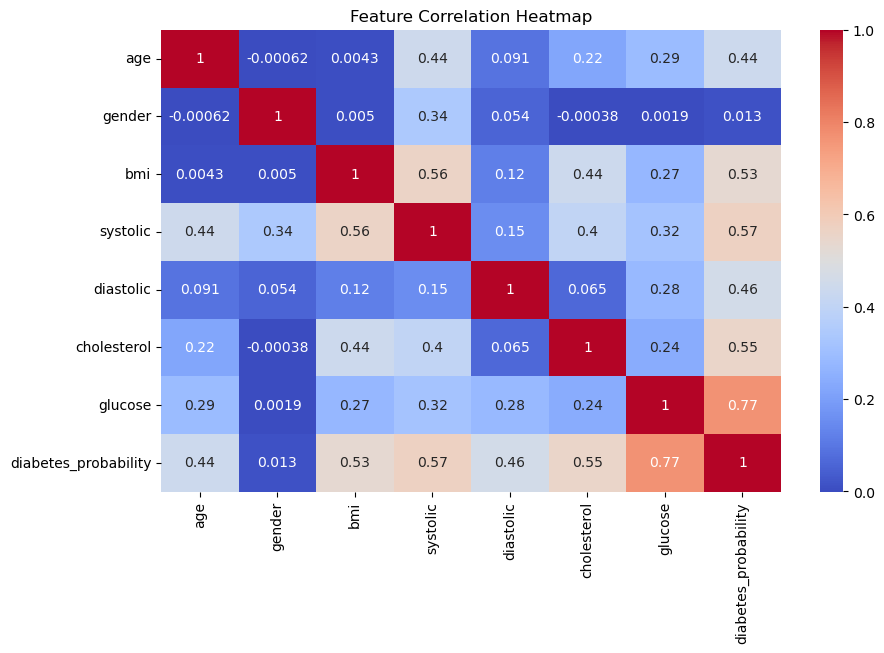

In [107]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

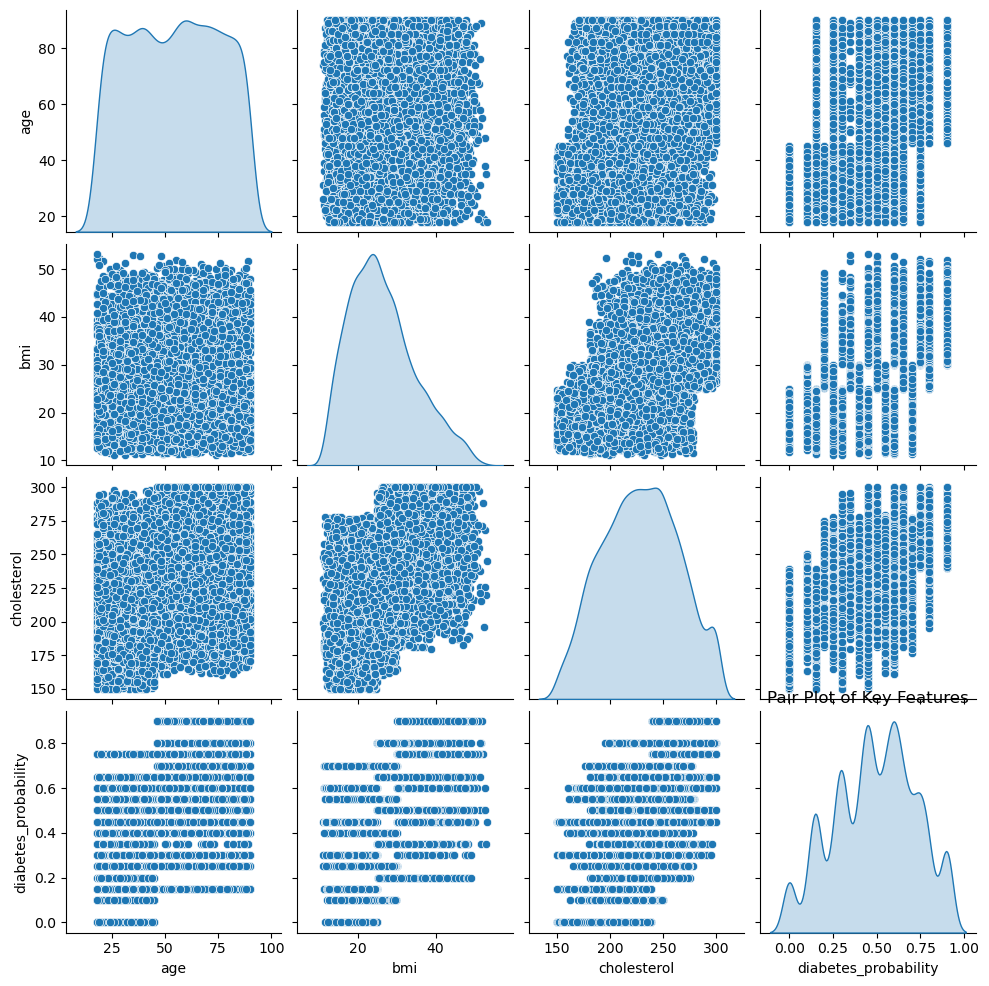

In [108]:
plt.figure(figsize=(10, 6))
sns.pairplot(data[['age', 'bmi', 'cholesterol', 'diabetes_probability']], diag_kind='kde')
plt.title('Pair Plot of Key Features')
plt.show()

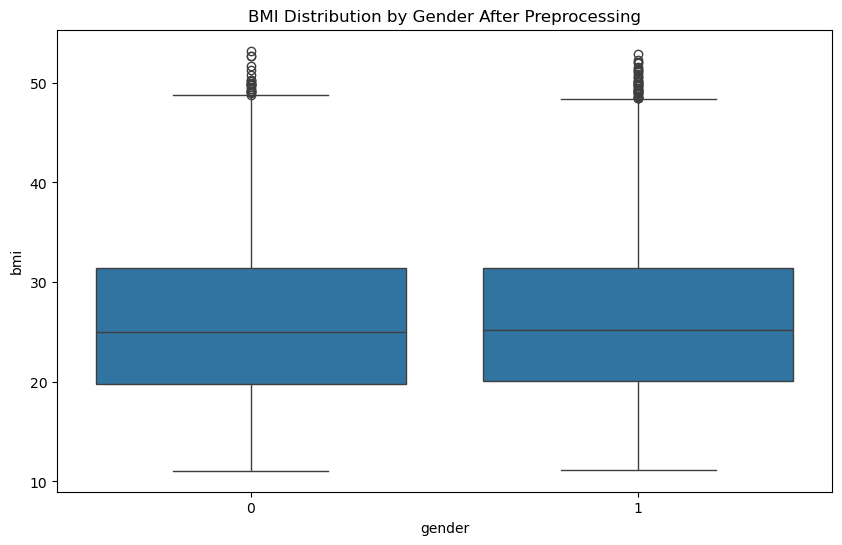

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='bmi', data=data)
plt.title('BMI Distribution by Gender After Preprocessing')
plt.show()